In [1]:
%load_ext autoreload 
# saving changes to code reloads them in the environment
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import sys
import funcy
from __future__ import division
import numpy as np
import scipy.optimize as spo
import pandas as pd
from collections import defaultdict
from code.gradient_descent import _gradient_descent, gradient_descent, SGD, g_error, b_error 
from code.helpers import f_gauss, d_gauss, f_bowl, d_bowl, get_lr
from code.basis_func import create_basis, create_cos_basis, BasisSearch, plotter
from code.constants import *
import pdb
import random
import pylab as pl

import os
from sklearn.linear_model import *
import seaborn as sns

In [2]:
# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(os.path.join('hw1code/P3', name))
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

AX, AY = getData('regressA_train.txt')
BX, BY =getData('regressB_train.txt')
VX, VY = getData('regress_validate.txt')

In [3]:
%%latex
Weights for Ridge: from bishop
$ w = (λI + Φ_{T}Φ_{−1}) Φ_{T}y$

<IPython.core.display.Latex object>

In [4]:
axt = create_basis(AX, M=9)[0]

In [5]:
cdata = pl.loadtxt('hw1code/P2/curvefittingp2.txt')

cX = np.array([cdata[0]]).T
cY = cdata[1,:]


In [6]:
cX.shape

(11, 1)

In [7]:
cY.shape

(11,)

# 3.1 Implement Ridge

In [266]:
def ridge_weights(x, y, M=9, l=.5):
    axt = create_basis(x, M=M)[0]
    
    lh = np.linalg.inv(np.eye(axt.shape[1])*l+ axt.T.dot(axt))
    return np.squeeze(lh.dot(axt.T.dot(y)))

def ridge_loss(x, y, w=None, M=9, l=.5):
    axt = create_basis(x, M=M)[0]
    #print axt.shape
    if w is None:
        lh = np.linalg.inv(np.eye(axt.shape[1])*l+ axt.T.dot(axt))
        w = np.squeeze(lh.dot(axt.T.dot(y)))
    
    mse = np.mean(np.abs((axt.dot(w) - y) ** 2))
    return mse

In [240]:
ridge_loss(cX, cY, M=0)

(11, 1)


1.2251781834232687

In [299]:
lspace = np.round(np.linspace(0, 10, 20), 2)
mspace  = range(1, 10)
def loss_map(cX, cY, lspace=lspace, mspace=mspace):
    return pd.DataFrame({l: pd.Series({m: ridge_loss(cX, cY,M=m, l=l)
                                for m in mspace})
                for l in lspace}).round(3).rename_axis('M').rename_axis('L', 1)

In [300]:
def oos_loss(Xtr, ytr, Xte, yte, **kwargs):
    w = ridge_weights(Xtr, ytr, **kwargs)
    return ridge_loss(Xte, yte, w=w, **kwargs)

In [301]:
def oos_loss_map(Xtr, ytr, Xte, yte, lspace=lspace, mspace=mspace):
    return pd.DataFrame({l: pd.Series({m: oos_loss(Xtr, ytr, Xte, yte, M=m, l=l)
                                for m in mspace})
                for l in lspace}).round(3).rename_axis('M').rename_axis('L', 1)

In [302]:
res = loss_map(cX, cY)

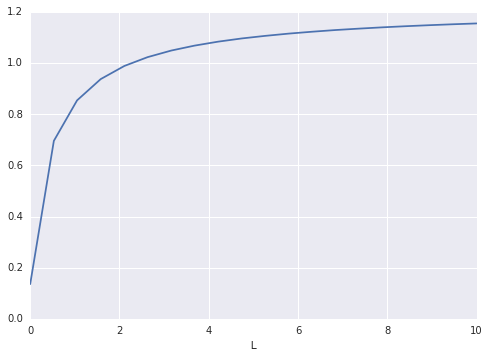

In [303]:
res.mean().plot()

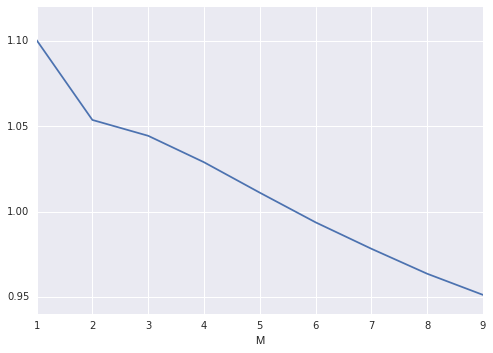

In [305]:
res.mean(1).plot()

As we expect, higher values of M and lower values of L lead to a near perfect in-sample fit to the data.

# 3.2 Train, Test, Validate for different `L` and `M` 

In [306]:
ridge_loss(BX, BY, w=ridge_weights(AX, AY))

3.8466279398776839

In [307]:
ridge_loss(AX, AY, w=ridge_weights(BX, BY))

157.2060270635431

In [308]:
loss_a = oos_loss_map(AX, AY, BX, BY)
loss_b = oos_loss_map(BX, BY, AX, AY)

In [309]:
loss_av = oos_loss_map(AX, AY, VX, VY)
loss_bv = oos_loss_map(BX, BY, VX, VY)

In [310]:
loss_b.stack().to_frame(name='MSE').reset_index().corr().round(2)

,M,L,MSE
M,1.00,0.00,0.12
L,0.00,1.00,-0.12
MSE,0.12,-0.12,1.00


In [311]:
loss_av.stack().idxmin()

(4, 10.0)

In [312]:
loss_bv.stack().idxmin()

(1, 10.0)

In [313]:
loss_av.stack().max()

5.8689999999999998

In [315]:
#loss_bv.stack().sort_values()

In [316]:
#sns.heatmap(np.clip(loss_bv, 0, loss_av.stack().max()))

In [ ]:
!export 

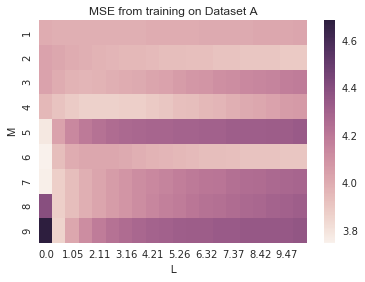

In [335]:
ax = sns.heatmap(loss_a.round(2), xticklabels=2)
ax.set_title('MSE from training on Dataset A')

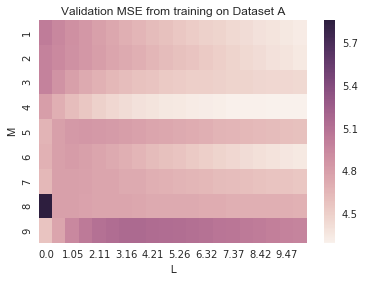

In [332]:
ax = sns.heatmap(loss_av.round(2), xticklabels=2)
ax.set_title('Validation MSE from training on Dataset A')

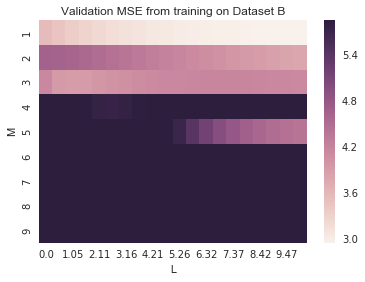

In [333]:
ax = sns.heatmap(np.clip(loss_bv, 0, loss_av.stack().max()),
                 xticklabels=2)
ax.set_title('Validation MSE from training on Dataset B')

In [334]:
#Ridge()

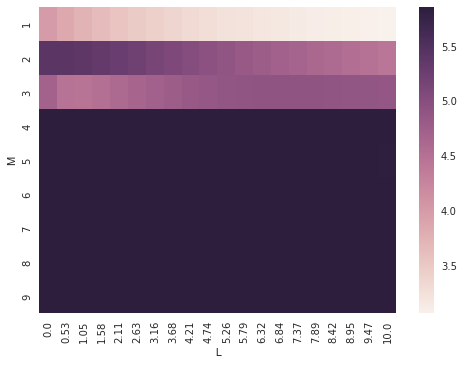

In [314]:
sns.heatmap(np.clip(loss_b, 0, loss_av.stack().max()))

loss_b.stack().sort_values()

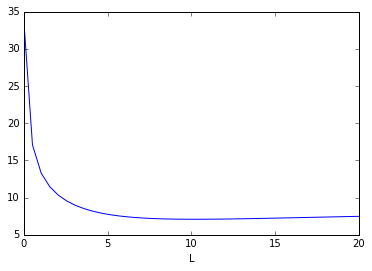

In [244]:
loss_b.median().plot()

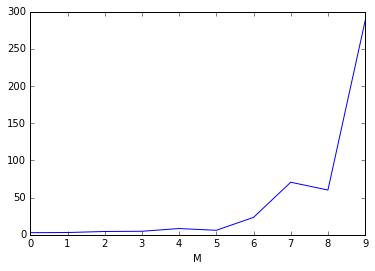

In [245]:
loss_b.median(1).plot()

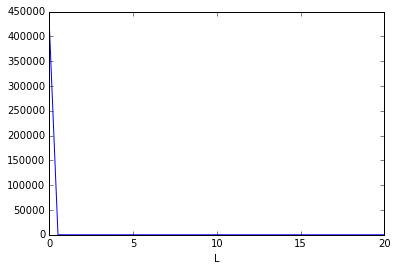

In [225]:
loss_b.mean().plot()

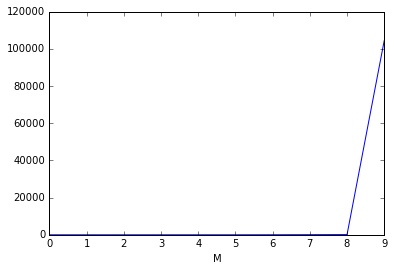

In [227]:
loss_b.mean(1).plot()

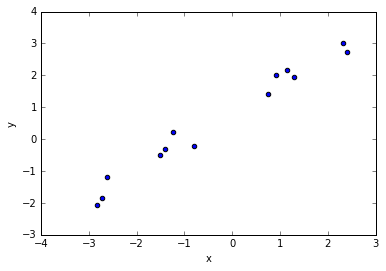

In [235]:
pd.DataFrame({'x': np.squeeze(AX), 'y': np.squeeze(AY)}).plot.scatter(x='x', y='y')

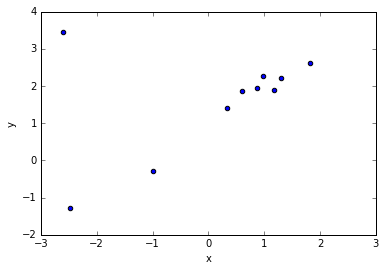

In [241]:
pd.DataFrame({'x': np.squeeze(BX), 'y': np.squeeze(BY)}).plot.scatter(x='x', y='y')